[nltk_data] Downloading package punkt to /Users/lucas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/lucas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/lucas/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/lucas/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


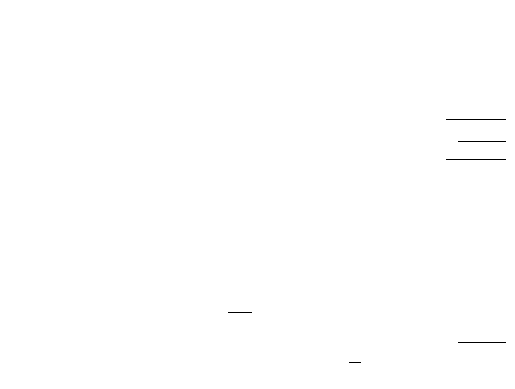

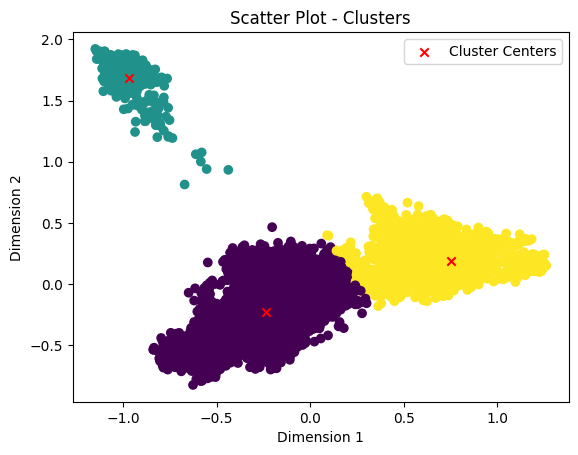

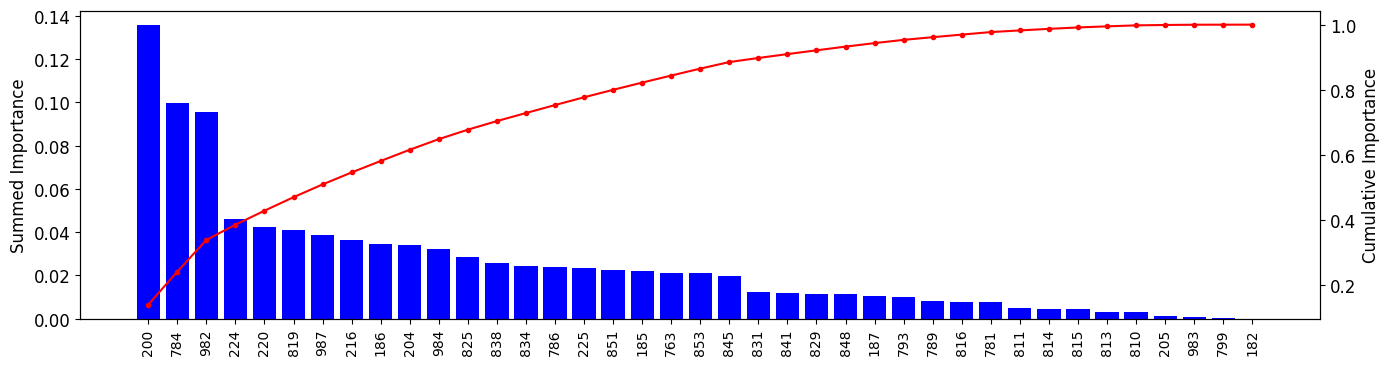

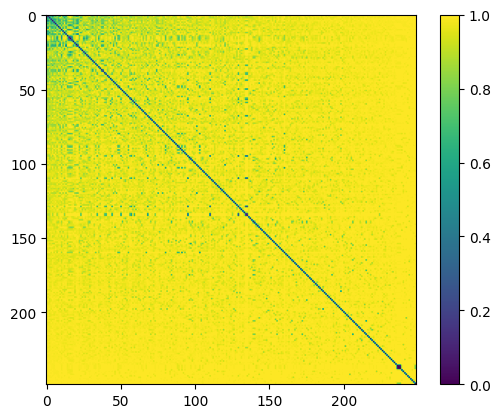

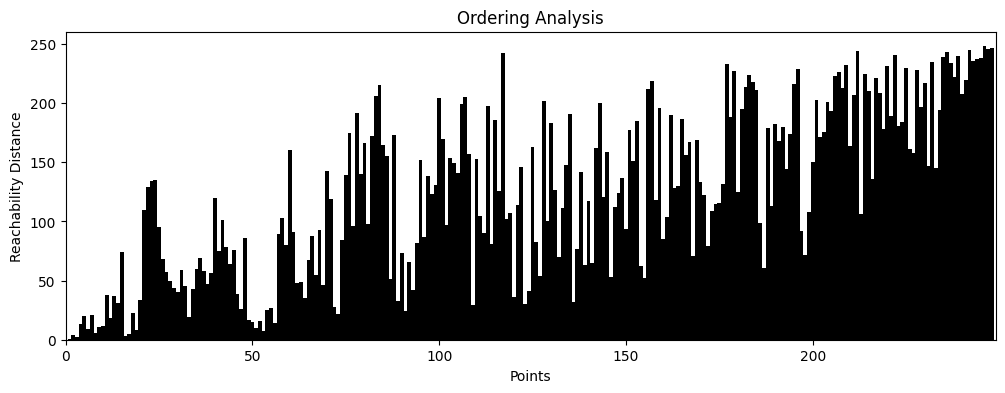

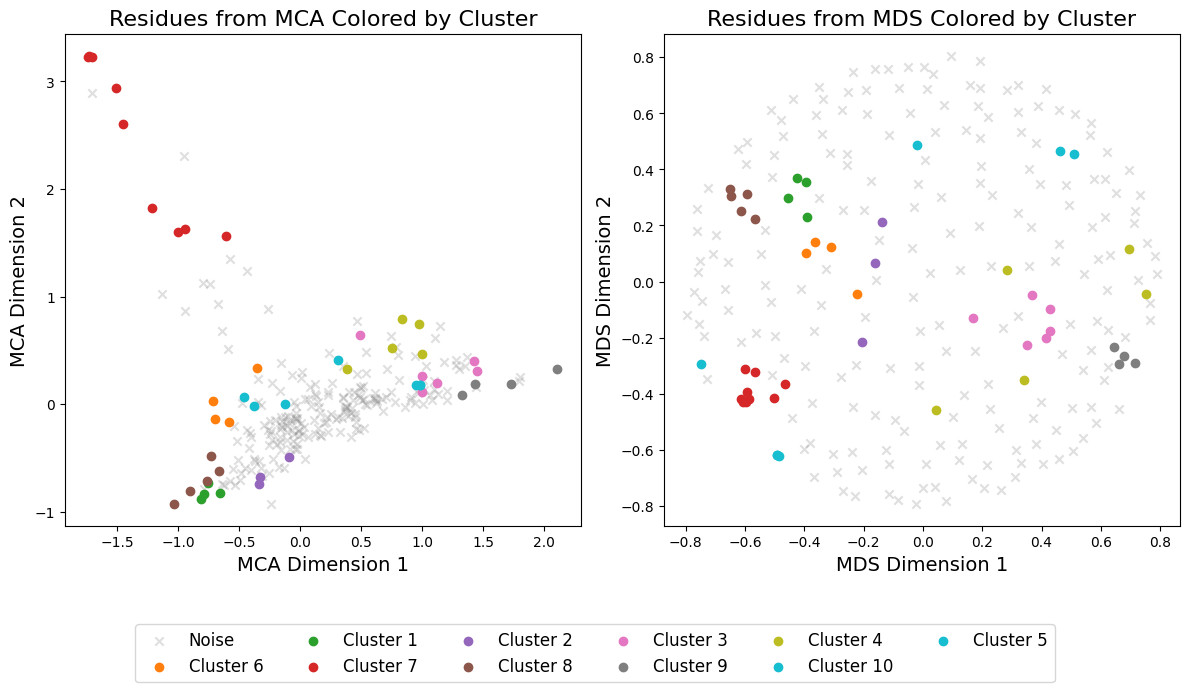

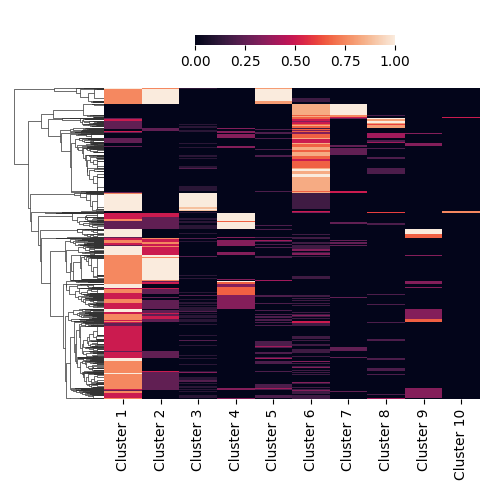

In [1]:
from protlearn import *

# Create data frame from raw data and clean it
msa_file = 'alignment.fasta'
msa = MSA()
msa.parse_msa_file(msa_file)
msa.cleanse_data(plot=True)
msa.analyse(plot=True)
msa.reduce()
msa.get_labels(plot=True)
msa.select_features(plot=True)
msa.get_clusters(plot=True)

In [80]:
import os
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Align import MultipleSeqAlignment


unique_labels = set(msa.labels)

for label in unique_labels:
    # Filter sequences based on the cluster label
    cluster_sequences = msa.data[msa.labels == label]

    # Select only the columns corresponding to selected_columns
    cluster_sequences = cluster_sequences[selected_columns]

    # Concatenate rows into strings
    cluster_sequences['Sequence'] = cluster_sequences.apply(lambda row: ''.join(row), axis=1)

    # Convert the sequences into a list of SeqRecord objects
    seq_records = []
    for i, seq_str in enumerate(cluster_sequences['Sequence']):
        # Modify the input sequence to match the weblogo alphabet (uppercase)
        seq_str = seq_str.upper()
        seq = Seq(seq_str)
        seq_record = SeqRecord(seq, id=f'Seq{i+1}', description=f'Cluster {label}')
        seq_records.append(seq_record)

    # Create a MultipleSeqAlignment from the SeqRecord objects
    alignment = MultipleSeqAlignment(seq_records)

    # Export the alignment to a FASTA file
    output_file = f'output/subalignments/alignment_cluster_{label}.fasta'
    with open(output_file, 'w') as fasta_file:
        for record in alignment:
            fasta_file.write(f'>{record.id} {record.description}\n{record.seq}\n')
